In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [2]:
# Load data
df = pd.read_csv('cloudpredictionsystemproject.csv')

In [3]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# Encode categorical variables
le = LabelEncoder()
label_encode_columns = ['Location', 'WindGustDirection', 'WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']
for col in label_encode_columns:
    df[col] = le.fit_transform(df[col])

In [5]:
# One-hot encode 'Location' column
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [6]:
# Handle missing values
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [7]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation', 
                      'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                      'Temperature9am', 'Temperature3pm']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

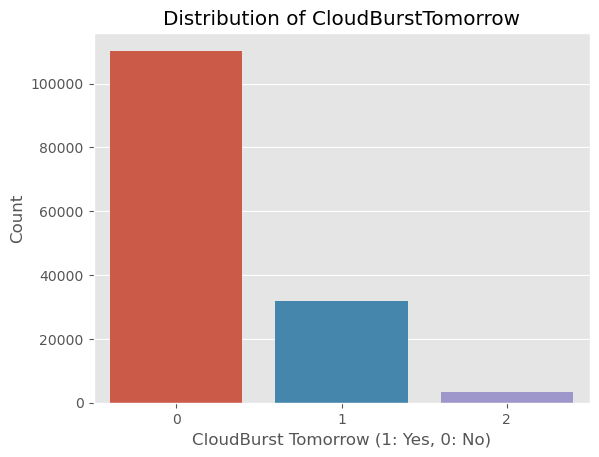

In [8]:
# EDA
plt.style.use('ggplot')
sns.countplot(x='CloudBurstTomorrow', data=df)
plt.title('Distribution of CloudBurstTomorrow')
plt.xlabel('CloudBurst Tomorrow (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

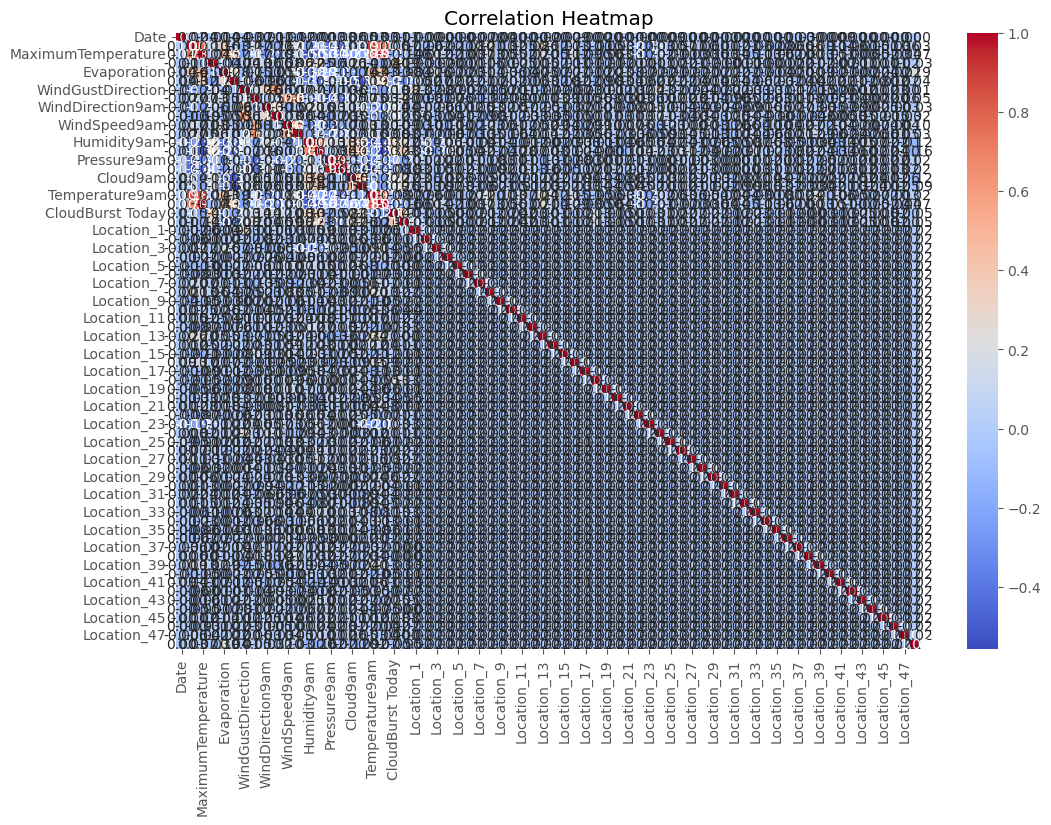

In [9]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

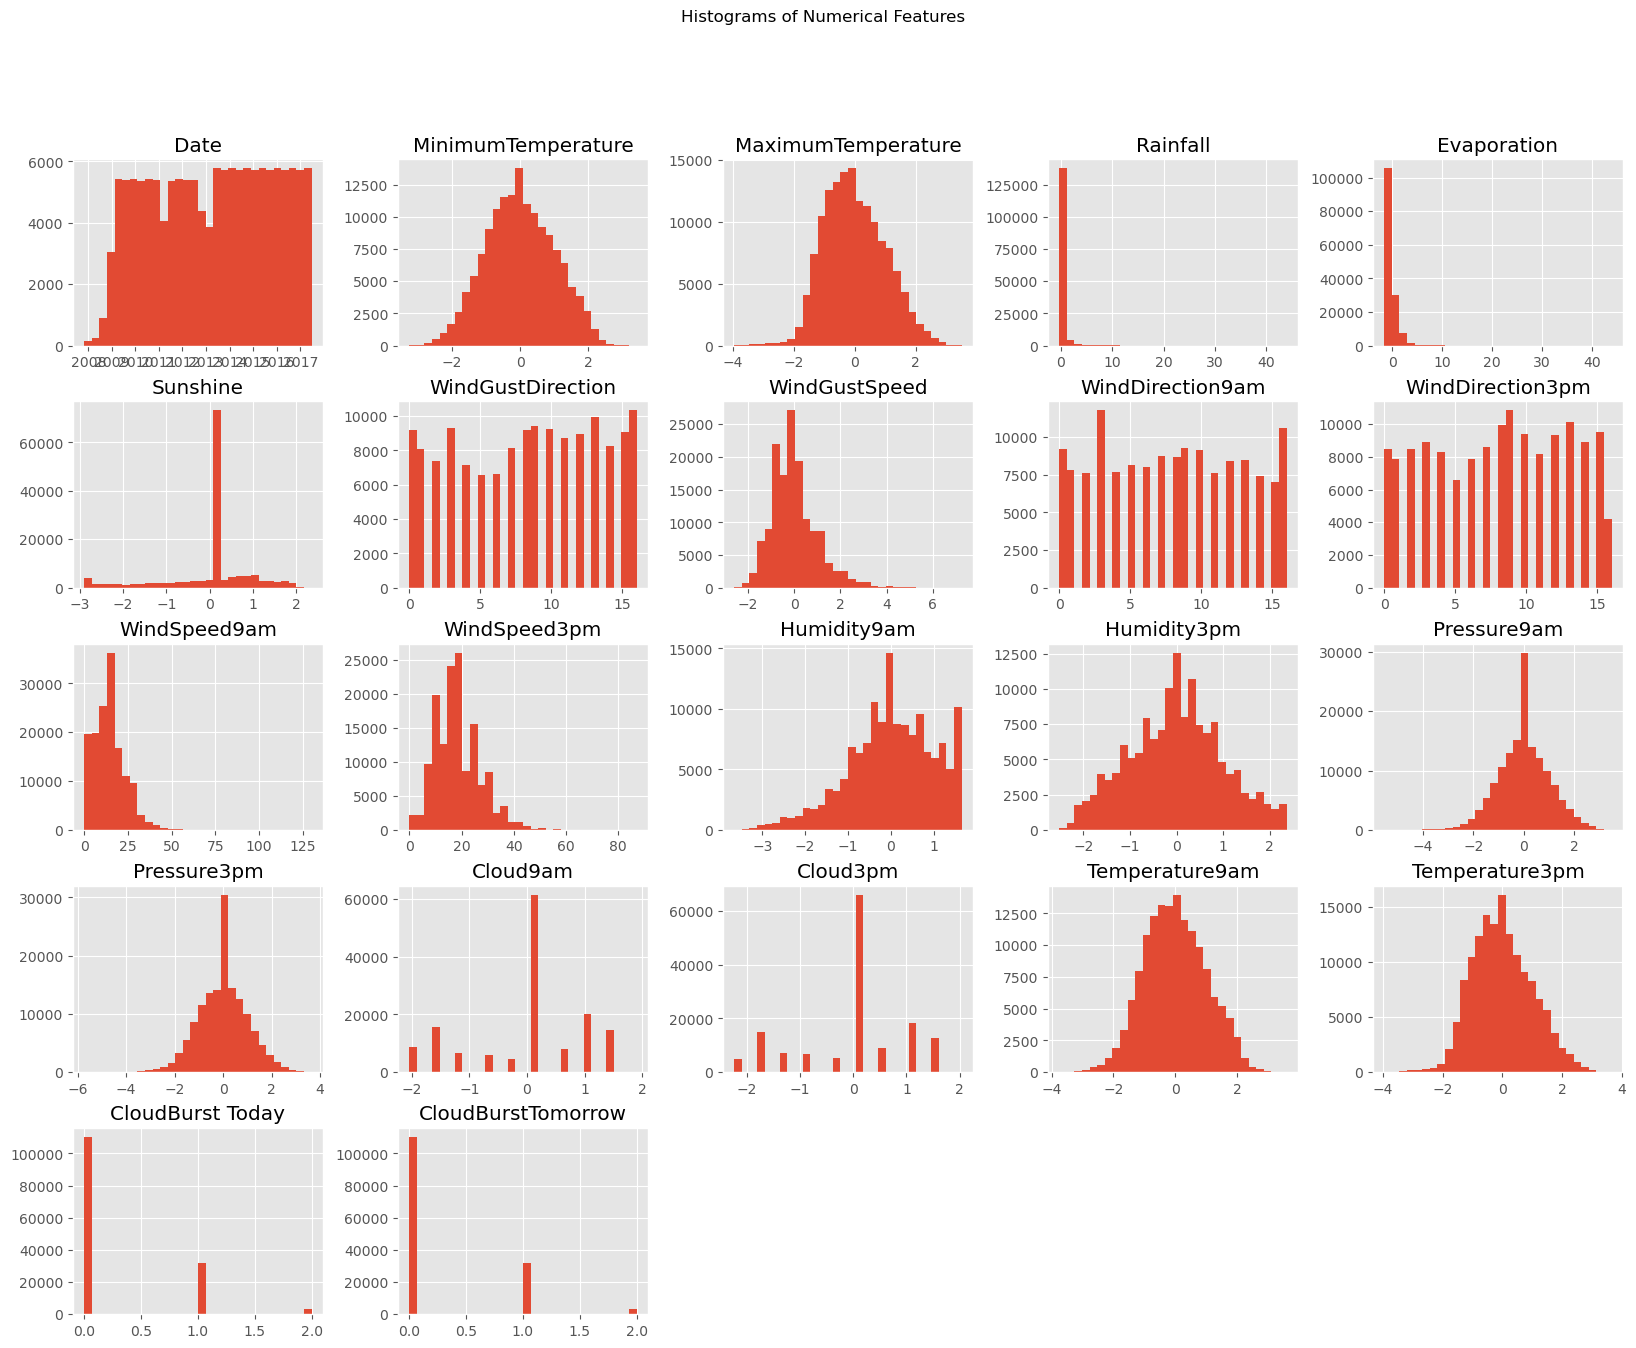

In [10]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

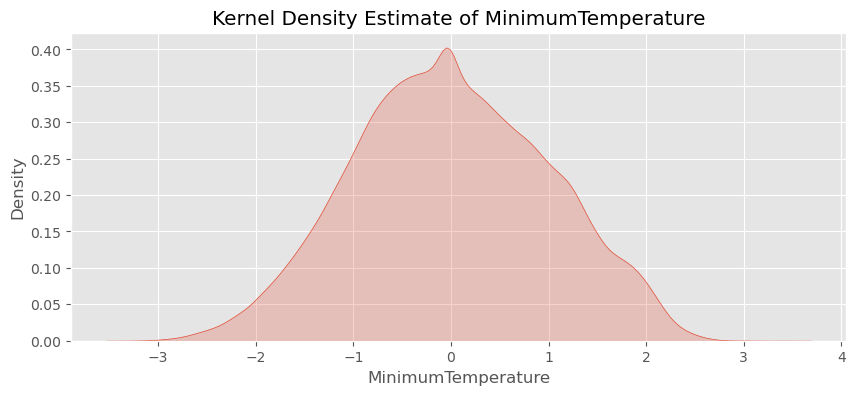

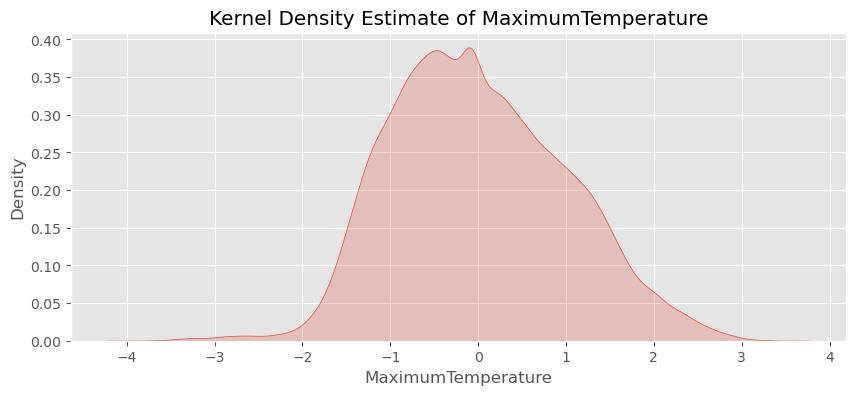

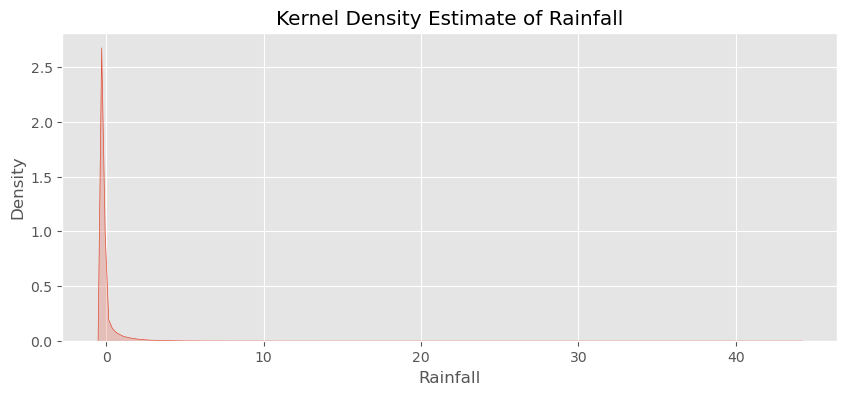

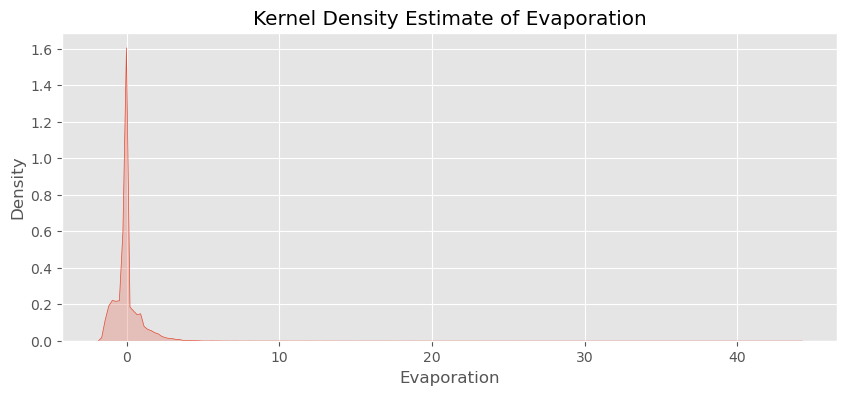

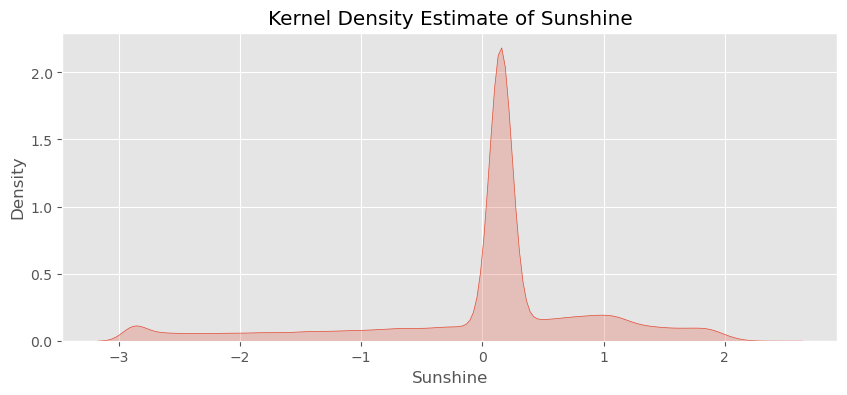

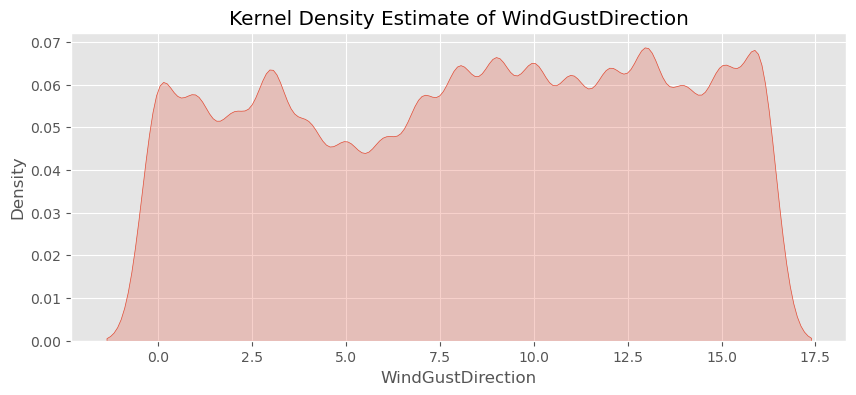

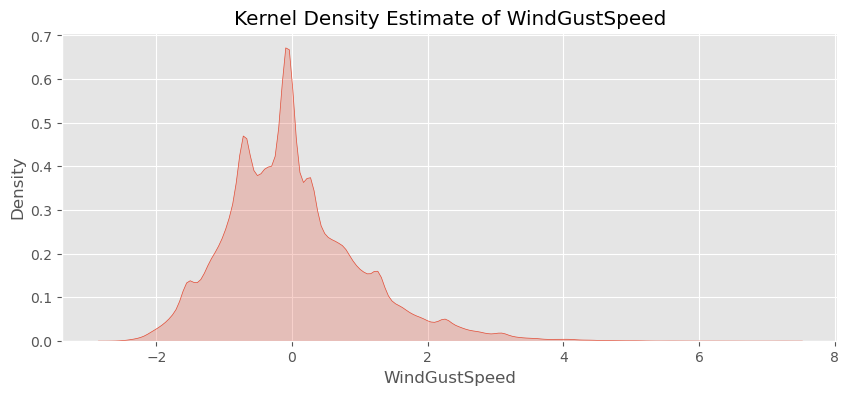

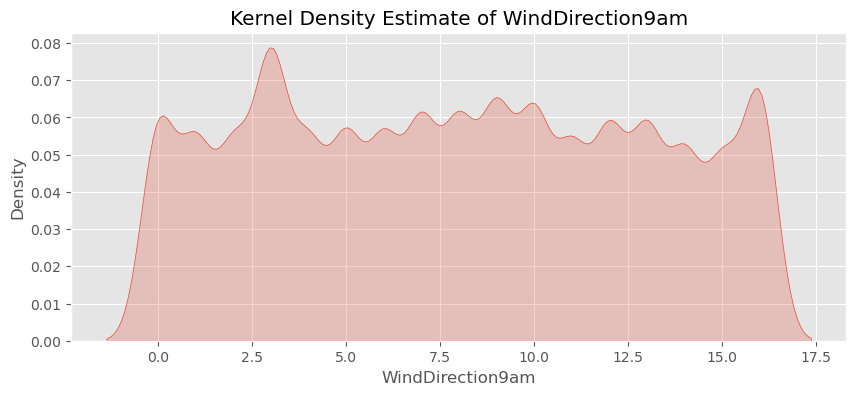

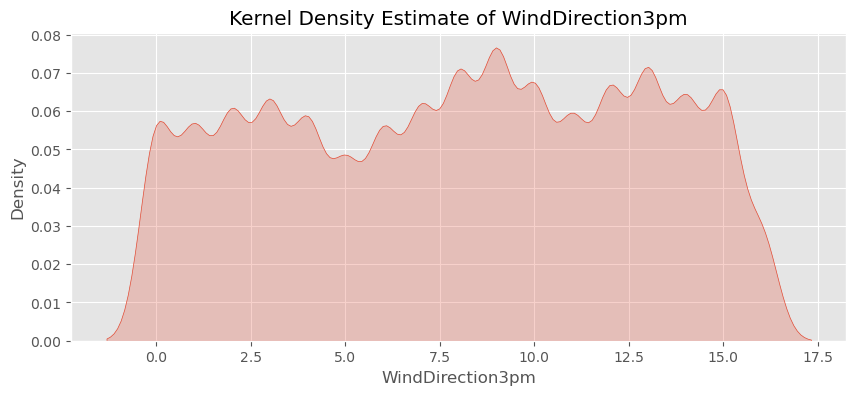

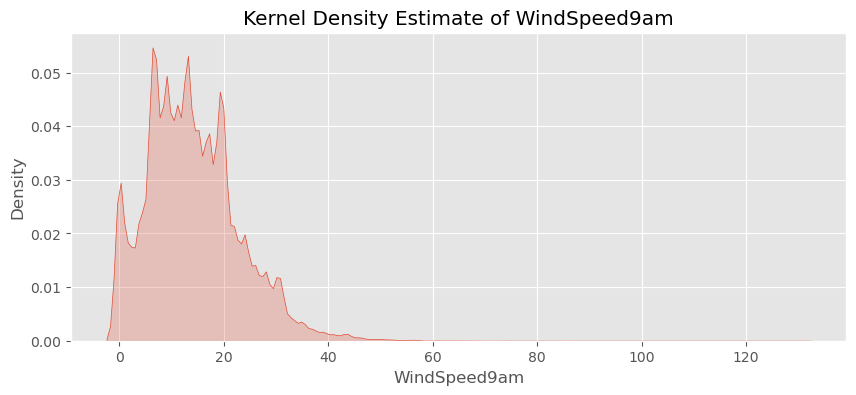

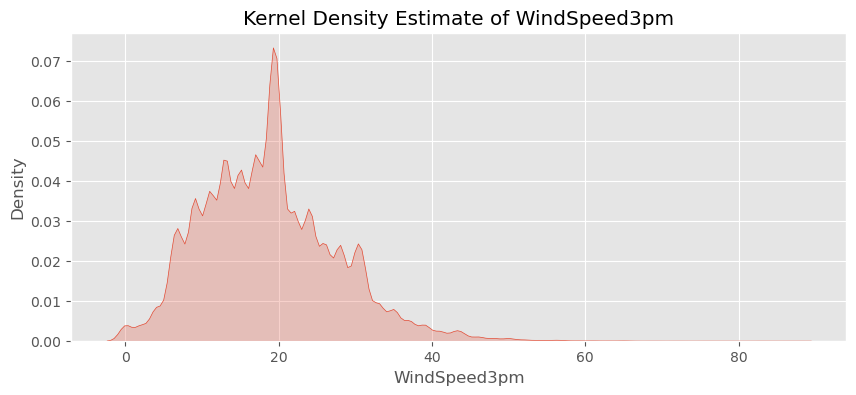

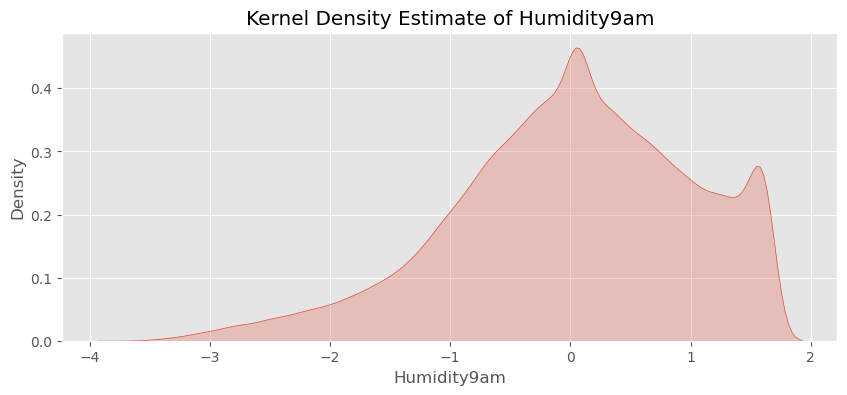

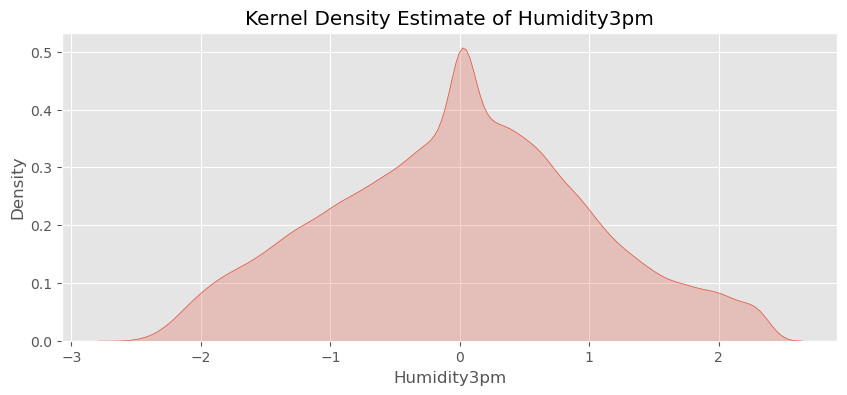

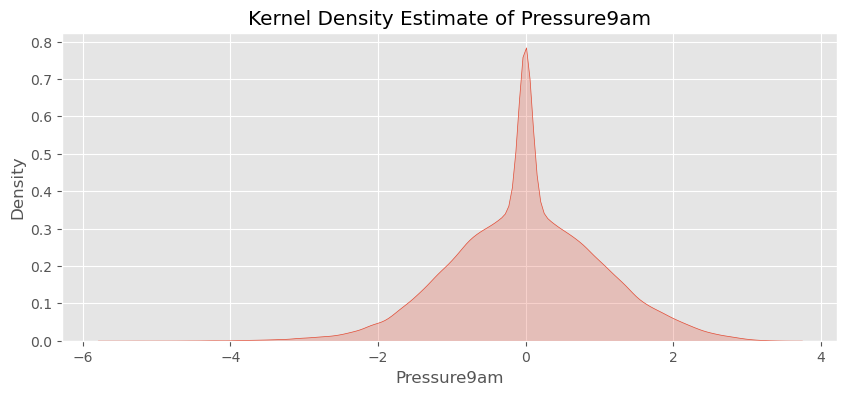

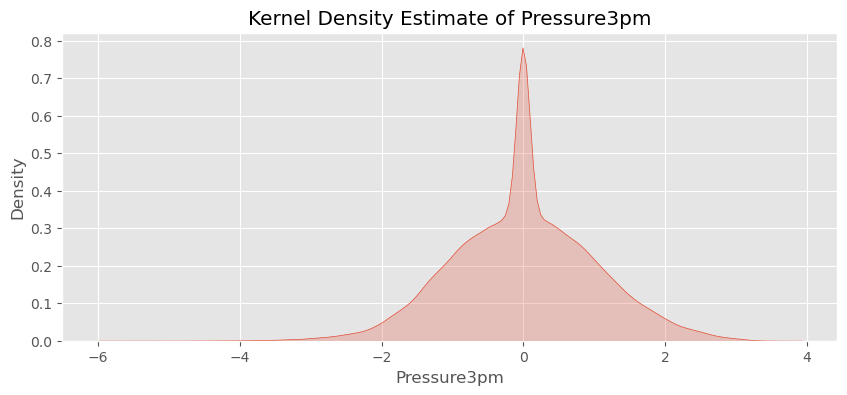

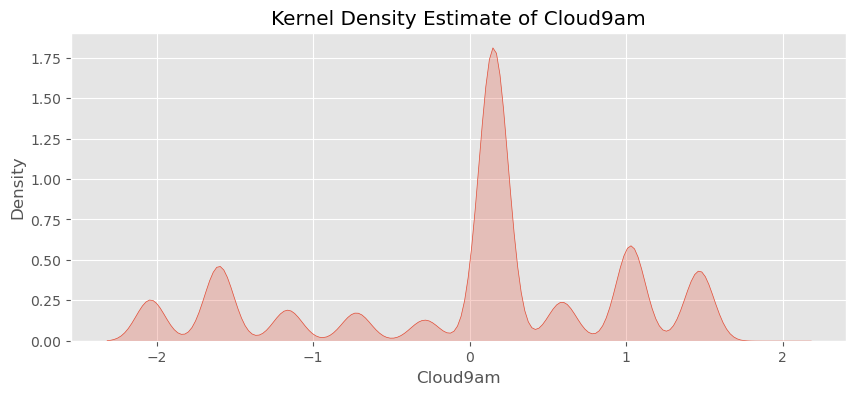

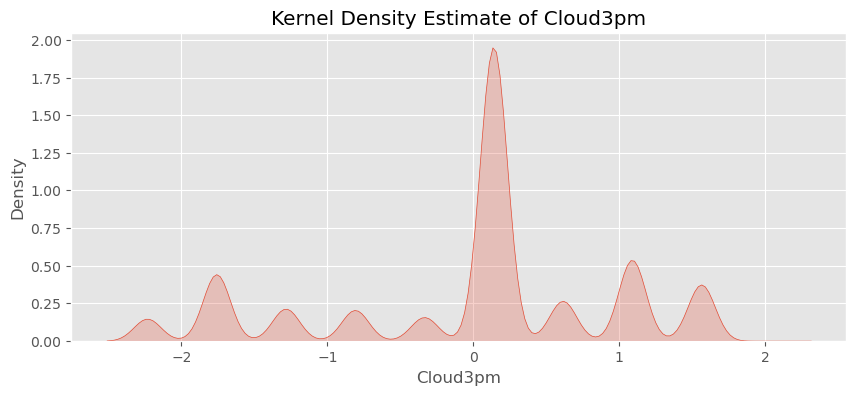

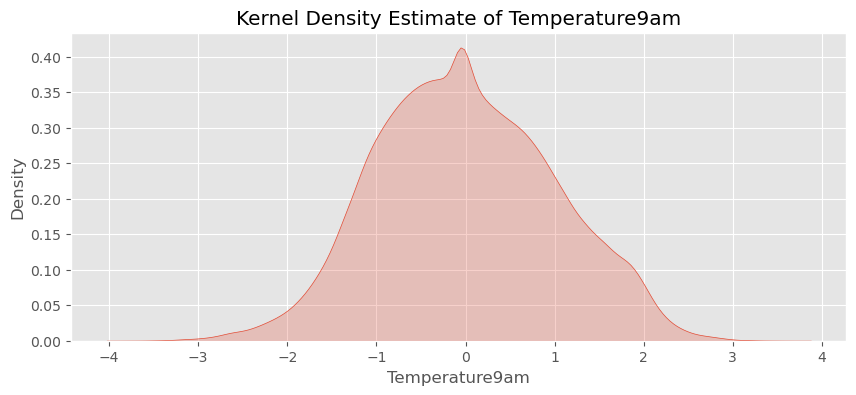

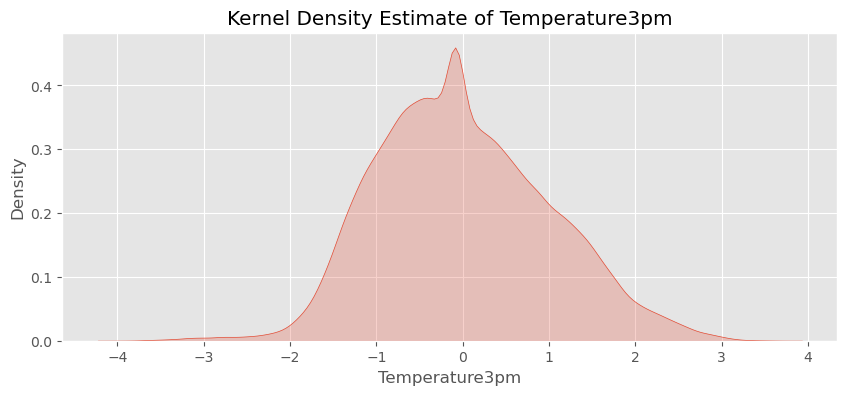

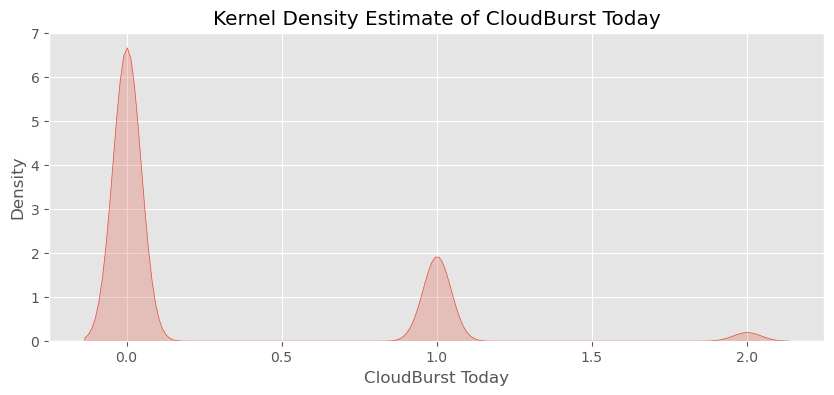

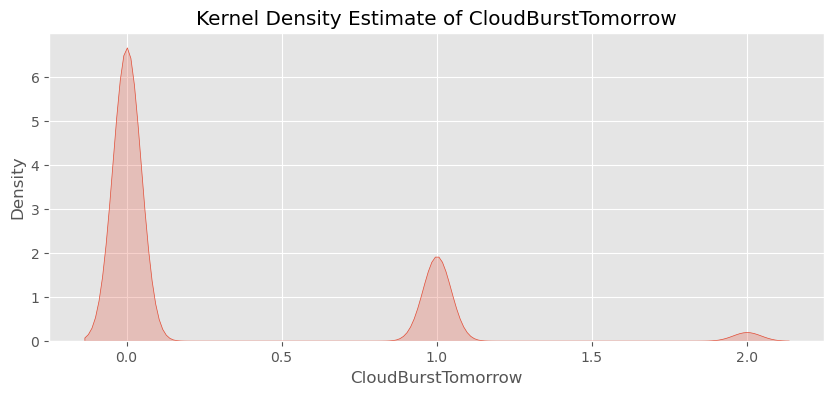

In [12]:
for feature in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Kernel Density Estimate of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

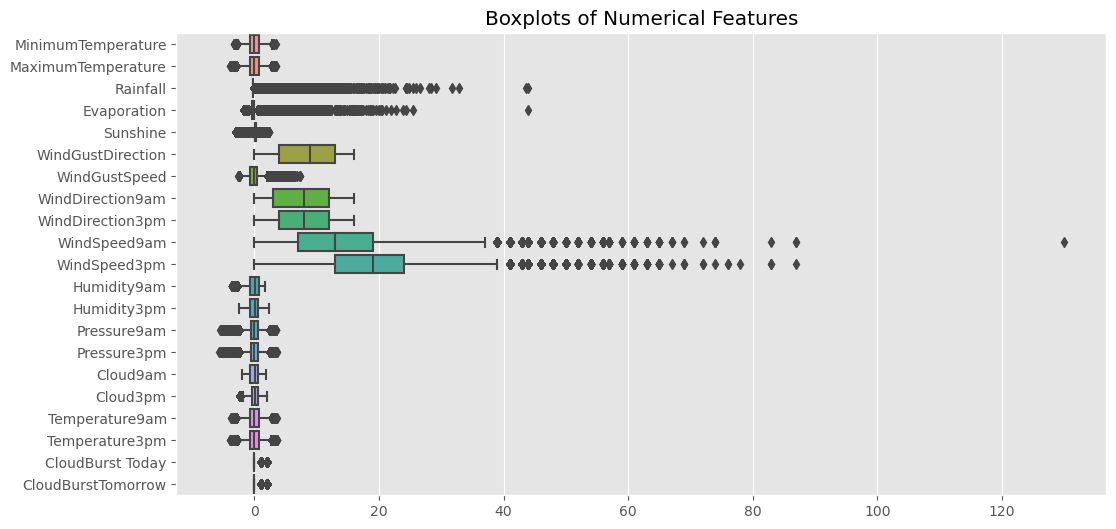

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
plt.title('Boxplots of Numerical Features')
plt.show()

In [14]:
# Feature Engineering
location_columns = [col for col in df.columns if 'Location_' in col]
features = numerical_features + location_columns

In [15]:
# Model Training and Evaluation
X = df[features]
y = df['CloudBurstTomorrow']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Model Evaluation
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8368279939502269
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22012
           1       0.75      0.50      0.60      6420
           2       0.94      0.25      0.40       660

    accuracy                           0.84     29092
   macro avg       0.85      0.57      0.63     29092
weighted avg       0.83      0.84      0.82     29092

Confusion Matrix:
 [[20993  1012     7]
 [ 3232  3184     4]
 [  419    73   168]]


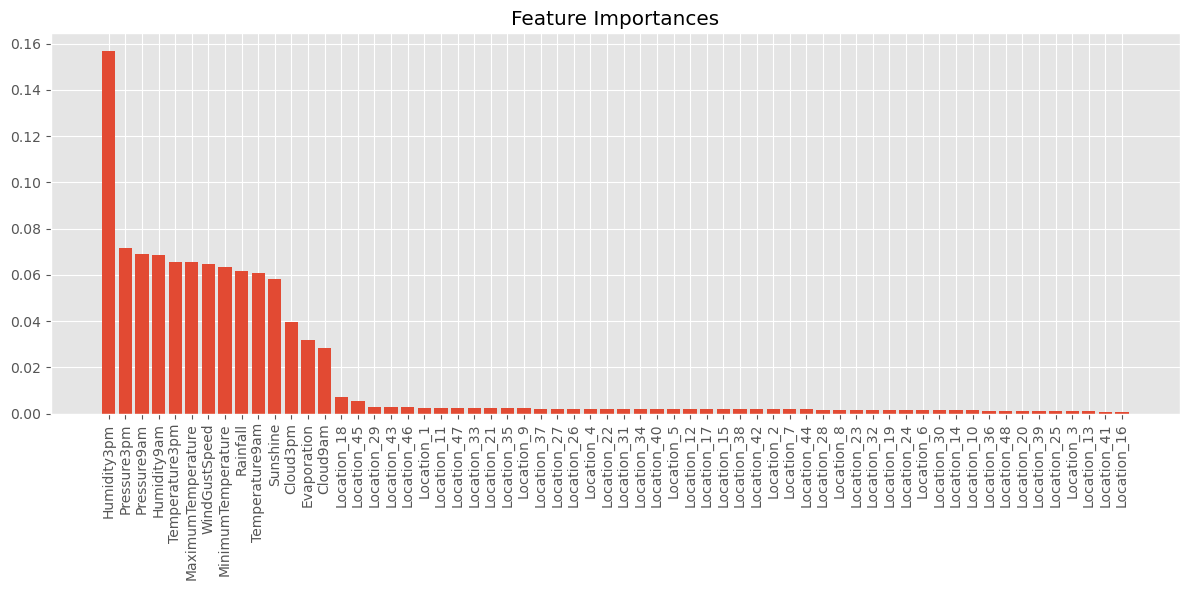

In [20]:
# Visualize Results
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

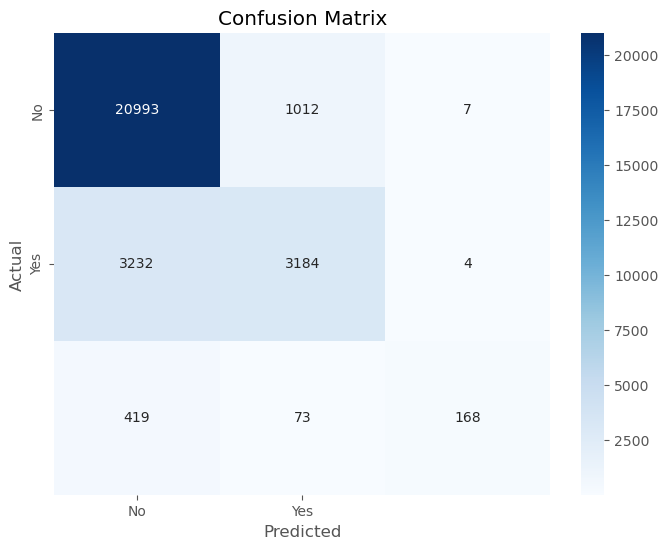

In [21]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

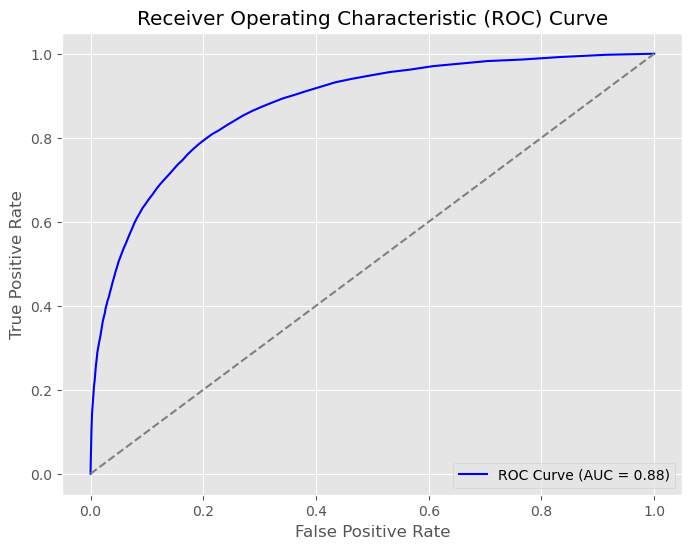

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

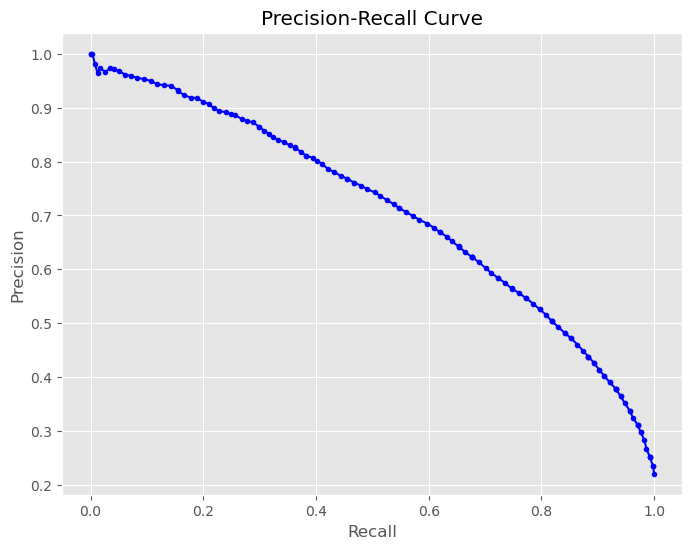

In [24]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

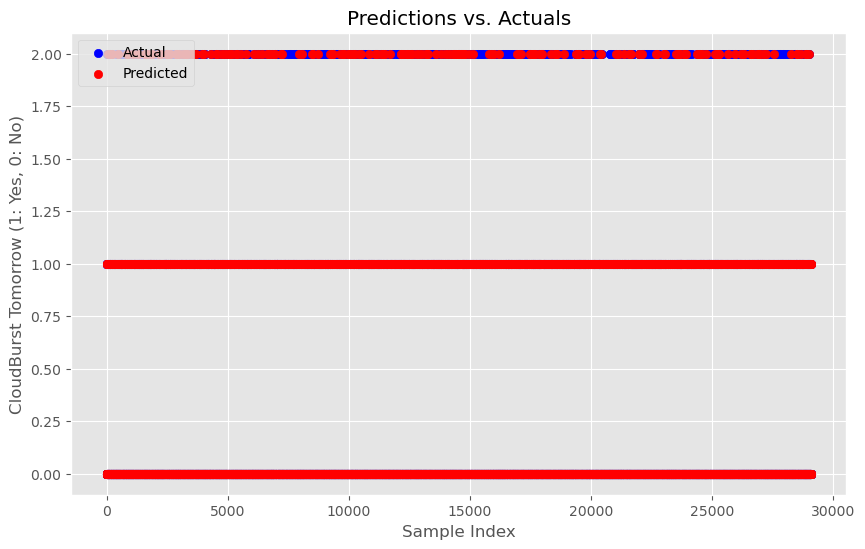

In [25]:
# Scatter Plot: Predictions vs. Actuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Predictions vs. Actuals')
plt.xlabel('Sample Index')
plt.ylabel('CloudBurst Tomorrow (1: Yes, 0: No)')
plt.legend()
plt.show()

In [1]:
import pandas as pd

# Load your dataset
file_path = 'cloudpredictionsystemproject.csv'  # Replace with your actual file path
df1 = pd.read_csv(file_path)

# Extract unique locations
unique_locations = df1['Location'].unique()

# Print unique locations
print("Unique Locations:", unique_locations)

Unique Locations: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [2]:
# Adjust the risk_factor_columns based on actual column names
risk_factor_columns = ['MinimumTemperature', 'Rainfall', 'WindGustSpeed', 'Cloud9am']

# Calculate overall mean values
overall_mean_values = df1[risk_factor_columns].mean()

# Initialize an empty dictionary to store risk multipliers
location_risk_multipliers = {}

# Calculate risk factors for each location
for location in df1['Location'].unique():
    location_data = df1[df1['Location'] == location]
    
    # Calculate the mean value of each risk factor for the location
    mean_values = location_data[risk_factor_columns].mean()
    
    # Calculate the risk multiplier (example: mean / overall mean)
    risk_multiplier = mean_values / overall_mean_values
    
    # Store the risk multipliers for the location
    location_risk_multipliers[location] = risk_multiplier.mean()  # Or use a different aggregation method if needed

# Display the risk multipliers
print(location_risk_multipliers)

{'Albury': 0.9632596459250504, 'BadgerysCreek': 0.8936907079245294, 'Cobar': 0.8041680671804224, 'CoffsHarbour': 1.3201391674941352, 'Moree': 0.8755119493851176, 'Newcastle': 1.1350806664228938, 'NorahHead': 1.2492160610479062, 'NorfolkIsland': 1.2254013878895114, 'Penrith': 0.9157689053528105, 'Richmond': 1.0282682499191003, 'Sydney': 1.1525635870255122, 'SydneyAirport': 1.1598068970474458, 'WaggaWagga': 0.8237828885349758, 'Williamtown': 1.1667381809795332, 'Wollongong': 1.3220380452581066, 'Canberra': 0.8482810795429876, 'Tuggeranong': 0.796713614650102, 'MountGinini': 0.9477257659672572, 'Ballarat': 0.9421156830126369, 'Bendigo': 0.8376010162458151, 'Sale': 0.9013291238910908, 'MelbourneAirport': 0.9461242471795439, 'Melbourne': 1.0230422267604553, 'Mildura': 0.7423501676421798, 'Nhil': 0.732216513742828, 'Portland': 1.0834101813501436, 'Watsonia': 0.9373289912000158, 'Dartmoor': 0.8625720405925836, 'Brisbane': 1.066177778025468, 'Cairns': 1.5369118609786918, 'GoldCoast': 1.3604905

In [3]:
# Define the columns to consider for risk factors
risk_factor_columns = ['MinimumTemperature', 'Rainfall', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm']

# Calculate overall mean values
overall_mean_values = df1[risk_factor_columns].mean()

# Initialize an empty dictionary to store risk multipliers
location_risk_multipliers = {}

# Calculate risk factors for each location
for location in df1['Location'].unique():
    location_data = df1[df1['Location'] == location]
    
    # Calculate the mean value of each risk factor for the location
    mean_values = location_data[risk_factor_columns].mean()
    
    # Calculate the risk multiplier (example: mean / overall mean)
    risk_multiplier = mean_values / overall_mean_values
    
    # Store the risk multipliers for the location
    location_risk_multipliers[location] = risk_multiplier.mean()  # Or use a different aggregation method if needed

# Display the risk multipliers
print(location_risk_multipliers)

{'Albury': 1.0103651849221034, 'BadgerysCreek': 0.8936907079245294, 'Cobar': 0.8144981537768865, 'CoffsHarbour': 1.2557206623427917, 'Moree': 0.8769957903496147, 'Newcastle': 1.0903103789107194, 'NorahHead': 1.2492160610479062, 'NorfolkIsland': 1.1953900156119812, 'Penrith': 0.9157689053528105, 'Richmond': 1.0669780014528851, 'Sydney': 1.1091325456470897, 'SydneyAirport': 1.1175822878824782, 'WaggaWagga': 0.84505992424015, 'Williamtown': 1.1322549152481023, 'Wollongong': 1.317294246971507, 'Canberra': 0.8908068467885766, 'Tuggeranong': 0.796713614650102, 'MountGinini': 0.9477257659672572, 'Ballarat': 1.0324393320456238, 'Bendigo': 0.8854003013007181, 'Sale': 0.9469817850978123, 'MelbourneAirport': 0.9903086868263132, 'Melbourne': 1.0550834808144625, 'Mildura': 0.7676703880713358, 'Nhil': 0.732216513742828, 'Portland': 1.1357640970845924, 'Watsonia': 0.9832724820426908, 'Dartmoor': 0.8625720405925836, 'Brisbane': 1.0250058623503682, 'Cairns': 1.4266587412459737, 'GoldCoast': 1.360490593

In [4]:
import tkinter as tk
from tkinter import messagebox

class CloudBurstPredictorApp:
    def __init__(self, master):
        self.master = master
        master.title("Cloud Burst Prediction")

        # Input Data Frame
        self.input_frame = tk.LabelFrame(master, text="Input Data")
        self.input_frame.pack(pady=10)

        # Input Fields
        self.input_fields = {}
        labels = [
            "Minimum Temperature",
            "Rainfall",
            "Sunshine",
            "WindGustSpeed",
            "Humidity",
            "Cloud",
            "Location",
            "CloudBurst Today"
        ]
        
        for label in labels:
            row = tk.Frame(self.input_frame)
            row.pack(fill="x", padx=5, pady=5)

            tk.Label(row, text=label).pack(side="left")
            entry = tk.Entry(row)
            entry.pack(side="right", expand=True, fill="x")
            self.input_fields[label] = entry  # Store the actual Entry widget instance

        # Predict Button
        self.predict_button = tk.Button(master, text="Predict", command=self.predict)
        self.predict_button.pack(pady=10)

    def predict(self):
        try:
            # Print input values
            input_values = {label: field.get() for label, field in self.input_fields.items()}
            print("Input Values:", input_values)

            # Get numerical input values
            min_temp = float(self.input_fields["Minimum Temperature"].get())
            rainfall = float(self.input_fields["Rainfall"].get())
            wind_gust_speed = float(self.input_fields["WindGustSpeed"].get())
            cloud = float(self.input_fields["Cloud"].get())
            location = self.input_fields["Location"].get().strip()

            # Check if the location is in the dataset
            if location not in location_risk_multipliers:
                messagebox.showerror("Error", f"Location '{location}' not recognized. Please enter a valid location.")
                return

            # Get the risk multiplier for the location
            risk_multiplier = location_risk_multipliers[location]

            # Adjust prediction conditions based on the location risk multiplier
            adjusted_min_temp = min_temp * risk_multiplier
            adjusted_rainfall = rainfall * risk_multiplier
            adjusted_wind_gust_speed = wind_gust_speed * risk_multiplier
            adjusted_cloud = cloud * risk_multiplier

            # Perform prediction based on adjusted conditions
            if adjusted_min_temp > 15 and adjusted_rainfall > 1 and adjusted_wind_gust_speed > 50 and adjusted_cloud > 5:
                prediction = "High risk of cloud burst"
            elif adjusted_min_temp > 10 and adjusted_rainfall > 0.5 and adjusted_wind_gust_speed > 30 and adjusted_cloud > 3:
                prediction = "Chances of cloud burst"
            else:
                prediction = "No cloud burst, be happy!"

            # Display prediction in a message box
            messagebox.showinfo("Prediction", prediction)

        except ValueError:
            messagebox.showerror("Error", "Please enter valid numerical values for input fields.")

root = tk.Tk()
app = CloudBurstPredictorApp(root)
root.mainloop()